##### <a class="anchor" id="Up"> </a>  

## Histograms, Correlations and Scatterplots

1. [Quick recap](#1)
2. [Histogram](#2)
3. [FacetGrid & Pairplot](#3)
4. [ScatterPlot](#4)
5. [Correlation](#5)
6. [Melt](#6)

## <font color="navy">Quick recap.</font> <a class="anchor" id='1'></a>

---
>### Functions covered in unit 6:
>
> `scatterplot` - (x,y) points on the graphs
>
> `lineplot` - simple lineplot
>
> `plt.figure(fixsize(m,n))` - set the size of the graph\figure to (m,n)
>
> `boxplot` - create a boxplot
>
> `reset_index` - reset index to a numerical index beginning at 0
>
> `sort_values()` - sorts values 
>
> `histplot` - create a histogram
>
> `std()` - standard deviation
>
> `to_pickle`, `read_pickle` - serialize dataframe to file, read from file
---
>### Functions covered in unit 7:
>
>* `.corr` - compute pairwise correlation of columns, excluding NA/null values. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
>
>* `.corr.style.background_gradient` - change the background color. [various options](corr.style.background_gradient)
>
>* `.plotting.scatter_matrix` - draw a matrix of scatter plots. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html?highlight=scatter_matrix)
>
>* `.plot.scatter` - plot a scatter plot
>
> Seaborn package:
>
>* `sns.scatterplot` - a scatter plot
>
>* `sns.regplot` - a scatter plot with a regression line
>
>* `sns.pairplot` - scatter plot matrix
>
> * `sns.heatmap` - a heatmap. @annot = True to print the values inside the square
>
---
>
>* `.rename` - alter axes (columns or rows) labels
>
>* `str.split(";", n = 6, expand = True)` - split strings around given separator/delimiter. When expand=True, expand the split stirngs to seperate columns
>
>* `pd.melt` - long format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’
>
>* `replace` - replace values
>
> * `sns.barplot` - shows mean and confidence intervals 
>
>* `sns.scatterplot` - a scatter plot
>
>* `plt.xticks(rotation=70)` - rotate the labels on the x-axis of a plot
>
>* `sns.FacetGrid` - show different aspects (Facets) of the data, on a grid
>
>* `map_datframe` - plots a function on the grid


### [▲](#Up)
---

<a class="anchor" id='2'></a>
## <font color="navy">Histogram.</font>

##### In the past week, we discussed, among other things, the box plot, in which we delved a bit into the interquartile range (IQR). 
##### We understood that there are advantages and disadvantages to using it.
##### One of the solutions to cope with this drawback is a __histogram__.

In [1]:
import pandas as pd
import seaborn as sns  # for creating the graphs
import matplotlib.pyplot as plt  #for reshaping graph size
import numpy as np
import random

In [2]:
# Creating a first DataFrame with the relative distribution of scores in the center and an average of 75
np.random.seed(0)
num_students = 80
grades = np.random.randint(60, 90, num_students)  # grade range 60-89
student_ids = range(1, num_students + 1)
names = ['Student ' + str(i) for i in range(1, num_students + 1)]
df1 = pd.DataFrame({'ID': student_ids, 'Name': names, 'Grade': grades})

# Creating a second DataFrame with the distribution of scores at the edges and an average of 75
np.random.seed(1)
grades_low = np.random.randint(40, 60, num_students // 2)  # grade range  40-59
grades_high = np.random.randint(90, 100, num_students // 2)  # grade range  90-99
grades = np.concatenate((grades_low, grades_high))
random.shuffle(grades)  # shuffle grades
df2 = pd.DataFrame({'ID': student_ids, 'Name': names, 'Grade': grades})



#### 1.1 Display side-by-side box plots for df1 and df2 depicting their distributions with appropriate titles for each graph.

#### 1.2 Do the plots appear similar when placed next to each other? Suggest a better way to visualize the plots.

#### 1.3 Create a histogram that will be displayed next to each other, note that you can learn a lot from this histogram.

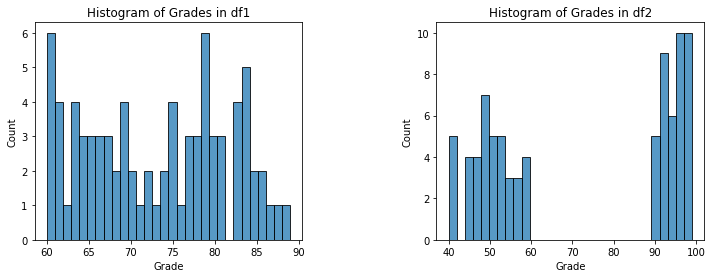

In [3]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

# Create histograms for the 'Grade' column in df1 and df2 with titles
sns.histplot(data = df1, x = 'Grade', ax = ax[0], bins=30)
ax[0].set_title('Histogram of Grades in df1')

sns.histplot(data = df2, x = 'Grade', ax = ax[1], bins=30)
ax[1].set_title('Histogram of Grades in df2')

plt.show()

#### Bonus question, display the 2 histograms in one graph.
##### We will expand on their uses in the following exercises

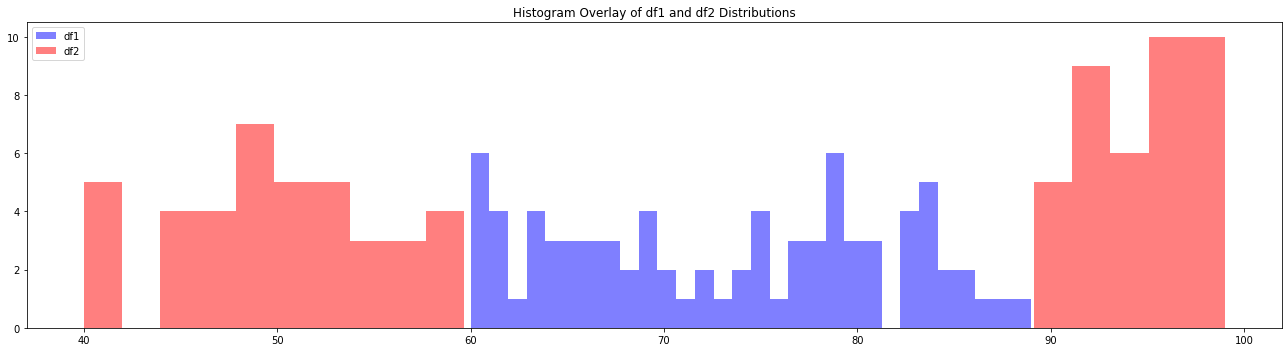

In [4]:
# Create Histogram Overlay
plt.figure(figsize=(18, 5))
plt.hist(df1['Grade'], bins=30, alpha=0.5, label='df1', color='blue')
plt.hist(df2['Grade'], bins=30, alpha=0.5, label='df2', color='red')
plt.legend()
plt.title("Histogram Overlay of df1 and df2 Distributions")

plt.tight_layout()
plt.show();

# The 'plt.tight_layout()' function in Matplotlib is used to automatically adjust the spacing between subplots to prevent overlapping.
# It adjusts the positions of axes to make sure there is no overlapping and the plots fit nicely within the fig

#### More suggestions for question 1.2, we will talk about them later.

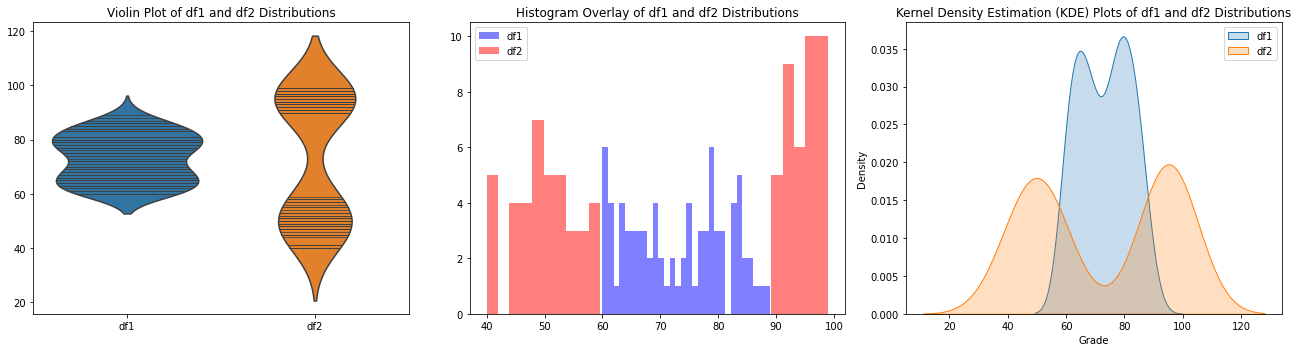

In [5]:
# Create Violin Plot
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.violinplot(data=[df1['Grade'], df2['Grade']], inner="stick")
plt.xticks([0, 1], ["df1", "df2"])
plt.title("Violin Plot of df1 and df2 Distributions")

# Create Histogram Overlay
plt.subplot(1, 3, 2)
plt.hist(df1['Grade'], bins=30, alpha=0.5, label='df1', color='blue')
plt.hist(df2['Grade'], bins=30, alpha=0.5, label='df2', color='red')
plt.legend()
plt.title("Histogram Overlay of df1 and df2 Distributions")

# Create KDE plot
plt.subplot(1, 3, 3)
sns.kdeplot(df1['Grade'], label='df1', shade=True)
sns.kdeplot(df2['Grade'], label='df2', shade=True)
plt.legend()
plt.title("Kernel Density Estimation (KDE) Plots of df1 and df2 Distributions")

plt.tight_layout()
plt.show();

---
### Types of distributions.
##### Let's learn how to read the code and how it works.

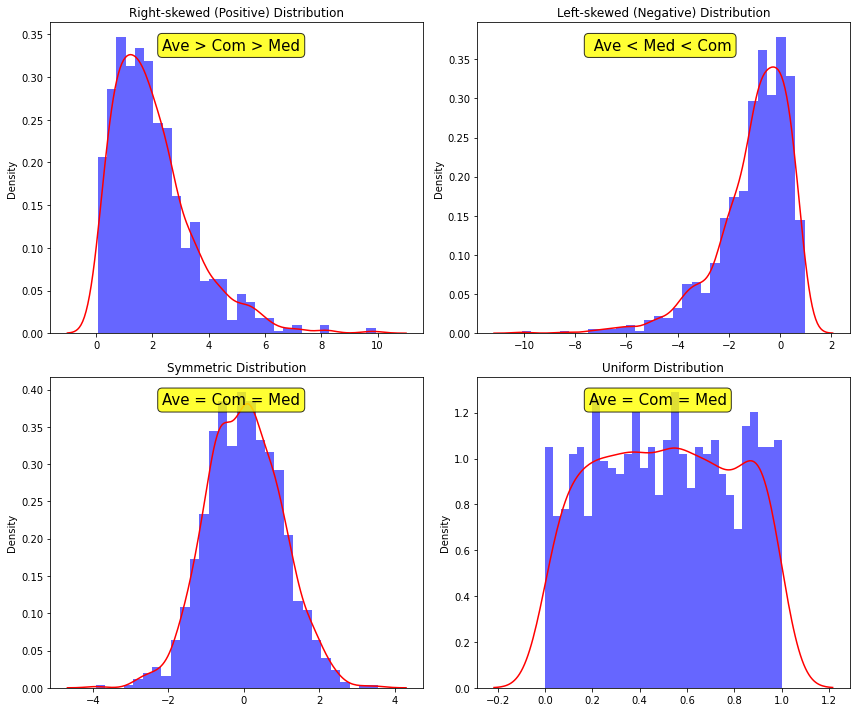

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create data for each distribution
data1 = np.random.gamma(2, 1, 1000)  # Right-skewed Distribution
data2 = (1- np.random.gamma(2, 1, 1000))  # Left-skewed Distribution
data3 = np.random.standard_normal(1000)  # Symmetric Distribution
data4 = np.random.uniform(0, 1, 1000)  # Uniform Distribution

# Titles for each subplot
titles = ["Right-skewed (Positive) Distribution", "Left-skewed (Negative) Distribution", "Symmetric Distribution", "Uniform Distribution"]

# Explanation text for each subplot
explanations = [
    "Ave > Com > Med",
    " Ave < Med < Com",
    "Ave = Com = Med",
    "Ave = Com = Med"
]
# Data and KDE for each subplot
datasets = [data1, data2, data3, data4]

for i, ax in enumerate(axes.flat):
    ax.hist(datasets[i], bins=30, density=True, alpha=0.6, color='blue')
    sns.kdeplot(datasets[i], color='red', ax=ax)
    ax.set_title(titles[i])

    # Add explanation text
    ax.text(0.3, 0.95, explanations[i], transform=ax.transAxes, fontsize=15,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))
    
# Adjust layout and display
plt.tight_layout()
plt.show()


---
## Read the following file:
#### titanic_df.

In [7]:
url = 'https://raw.githubusercontent.com/Razelbaz1/exercises-package/master/data/titanic.csv'
titanic_df = pd.read_csv(url,encoding='latin1')

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


#### 2. Present in a histogram the percentage of ages by department (in only one figure)
#### Add __KDE__ parameter to your figure.

#### 3. Show the distribution of classes on the ship according to __probability__  and according to age groups in increments of 10 (starting from age 0).

#### 3.1 Show only the ages 10 to 50 in the figure.

#### 4. Look at the following parameter: what do you think is the difference and what does it contribute to us?

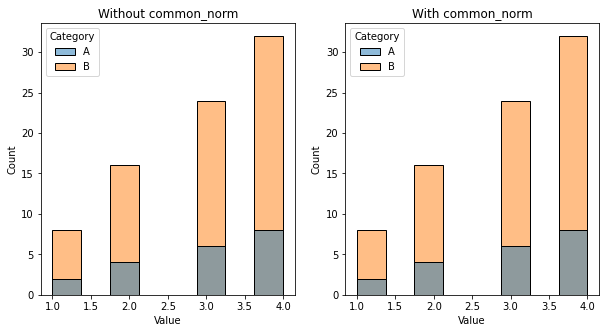

In [9]:
# Sample data with two categories
data = {'Category': ['A'] * 20 + ['B'] * 80, 'Value': [1, 2, 2, 3, 3, 3, 4, 4, 4, 4] * 10}

plt.figure(figsize=(10, 5))

# Without common_norm
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Value', hue='Category', common_norm=False)
plt.title('Without common_norm')

# With common_norm
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='Value', hue='Category', common_norm=True)
plt.title('With common_norm')

plt.show()


#### Can we conclude that all adults prefer first class? (ages 60-70)

### [▲](#Up)
---

<a class="anchor" id='3'></a>
## <font color="navy">FacetGrid &  Pairplot.</font>

### Main idea :  pick out a categorical feature in our data and then create one plot for each and every category.

### Steps for building FacetGrid :

>    1. __Create FacetGrid:__ Start by setting up a FacetGrid using `sns.FacetGrid()`. This is where you tell it what data to use and how to group your data into facets.

>    2. __Choose Plot Type:__ Decide what type of plot you want to use for each facet. You can do this with `g.map()` or `g.map_dataframe()`. This step specifies the kind of plot that    >                              goes into each part of your grid.

>    3. __Customize Your Grid:__ To make your grid unique, you can use different `methods` and `attributes` that come with the *FacetGrid*.
>    This allows you to personalize and fine-tune your visual representation.





#### 5. Display a facetgrid figure by classes so that the corresponding ages are displayed.

### Data from Unit 7, house_df :

In [10]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/housing.csv'
house_df = pd.read_csv(url)
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 6. Display a facetgrid figure by 'ocean_proximity' over the distribution of median income and median house value

#### 7. Create a grid to visualize the distribution of the `housing_median_age` variable for each ocean proximity category using Seaborn's FacetGrid function:

### hint
Facet the grid based on the ocean_proximity variable.
Create histograms for the housing_median_age variable within each facet.

---
#### 8. We can distinguish relationships between columns by the `pairplot` function Type `sns.pairplot()` and enter the appropriate parameters

#### 9. As with any function, there are countless options to set our preferences. 
#### Display only the following columns using `pairplot()`
##### 'housing_median_age','total_rooms','total_bedrooms','population'

### [▲](#Up)
---

<a class="anchor" id='4'></a>
## <font color="navy">Scatter Plot.</font>

In [11]:
house_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

#### 10. Show a scatter graph of `total_bedrooms` by `total_rooms` and next to it a scatter graph of `total_bedrooms` by `housing_median_age`

#### 11. Display a scatter graph by `total_rooms` and `total_bedrooms` and differentiate between the values by `ocean_proximity`

### [▲](#Up)
---

<a class="anchor" id='5'></a>
## <font color="navy">Correlation.</font>

In [12]:
# plt.colormaps()

In [13]:
diamonds = sns.load_dataset('diamonds')

In [14]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### We will write the names of the columns to make it clearer

In [15]:
diamonds.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)
diamonds.head(1)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


#### Create another column called L/W ratio by dividing the length by width and see how it correlates with our other features later.

In [16]:
diamonds['L/W'] = diamonds['length']/diamonds['width']

In [17]:
print(diamonds.head())

   carat      cut color clarity  depth %  table %  price  length  width  \
0   0.23    Ideal     E     SI2     61.5     55.0    326    3.95   3.98   
1   0.21  Premium     E     SI1     59.8     61.0    326    3.89   3.84   
2   0.23     Good     E     VS1     56.9     65.0    327    4.05   4.07   
3   0.29  Premium     I     VS2     62.4     58.0    334    4.20   4.23   
4   0.31     Good     J     SI2     63.3     58.0    335    4.34   4.35   

   depth       L/W  
0   2.43  0.992462  
1   2.31  1.013021  
2   2.31  0.995086  
3   2.63  0.992908  
4   2.75  0.997701  


#### We will explain the following lines in more depth in the prediction chapter.

In [18]:
diamonds[['length','width','depth','L/W']]=diamonds[['length','width','depth','L/W']].replace(0,np.NaN)

diamonds.dropna(inplace=True)

In [19]:
diamonds.loc[(diamonds['length'] == 0) | (diamonds['width'] == 0) | (diamonds['depth'] == 0) | (diamonds['L/W'] == 0) ]

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W


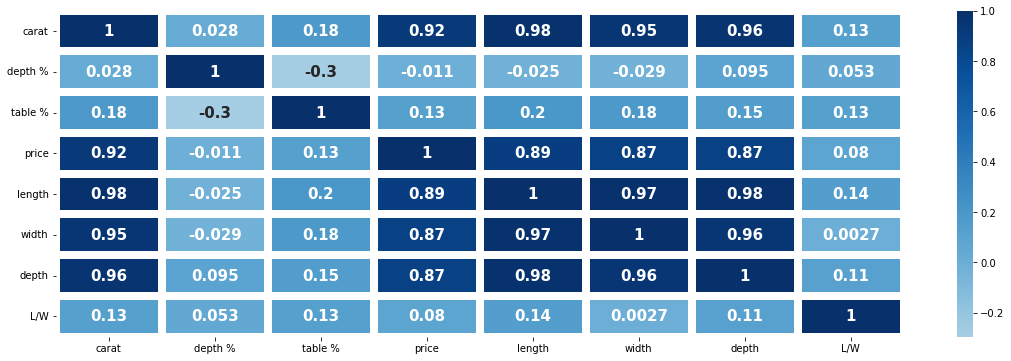

In [20]:
f, ax = plt.subplots(figsize=(19, 6))
sns.heatmap(diamonds.corr(), annot=True, linewidths=8,cmap='Blues',
            annot_kws = {
                   'fontsize' : 15,
                   'fontweight' : 'bold'
                       },center=0,ax=ax)
plt.yticks(rotation = 0);

From the above plot, We can see that carat, length, width, depth, and price are having a high correlation with each other.

However, the categorical data is not taken into account. Since these categories are considered as essential factors for pricing the diamond, therefore, we will compare each category feature with the price.

#### 12. Correlate on house_df
#### Class discussion: What can be said about this correlation?

### [▲](#Up)
---

 <a class="anchor" id='6'></a>
## <font color="navy">Melt.</font>

In [21]:
data = {'Date': ['2023-01-01', '2023-01-02'],
        'Product A Sales': [100, 120],
        'Product B Sales': [80, 90],
        'Product C Sales': [50, 60]}

sales_df = pd.DataFrame(data)


### Now, if you want to analyze this data more effectively, you may want to reshape it into a long format where each row represents a single sale with columns 'Date', 'Product', and 'Sales'. You can achieve this using the `melt()` function.

In [22]:
# Reshaping the data using melt
melted_df = sales_df.melt(id_vars=['Date'], var_name='Product', value_name='Sales')

### Now, you have the data in a format that makes it easier to perform various __analyses and visualizations__, such as __calculating total sales__ for each product or __plotting trends__ over time.

---
### Question for Practice:

1. Given a DataFrame containing student exam scores with columns 'Student ID', 'Math Score', 'Science Score', and 'English Score', use the `melt()` function to reshape the data into a long format with columns 'Student ID', 'Subject', and 'Score'. This format will make it easier to compare scores across subjects for each student. Provide the code to achieve this transformation.

In [23]:
# Sample DataFrame with exam scores
data = {'Student ID': [1, 2, 3],
        'Math Score': [85, 78, 92],
        'Science Score': [92, 88, 75],
        'English Score': [78, 90, 85]}

exam_scores_df = pd.DataFrame(data)

2. You have a dataset containing monthly weather data for different cities, with columns 'City', 'Jan Temp', 'Feb Temp', ..., 'Dec Temp'. Use the `melt()` function to reshape the data into a long format with columns 'City', 'Month', and 'Temperature'. Provide the code to perform this transformation."

In [24]:
# Sample DataFrame with monthly weather data
data = {'City': ['City A', 'City B', 'City C'],
        'Jan Temp': [15, 12, 18],
        'Feb Temp': [14, 13, 16],
        'Mar Temp': [17, 15, 20],
        # ... Continue with temperature data for other months
        }

weather_df = pd.DataFrame(data)

In [25]:
weather_df

,City,Jan Temp,Feb Temp,Mar Temp
0,City A,15,14,17
1,City B,12,13,15
2,City C,18,16,20


3. Given a DataFrame representing customer orders with columns 'Order ID', 'Customer Name', 'Product 1', 'Product 2', ..., 'Product N', where 'Product 1', 'Product 2', etc., represent different products in an order, use the `melt()` function to reshape the data into a long format with columns 'Order ID', 'Customer Name', 'Product Name', and 'Quantity'. This format will make it easier to analyze individual product quantities in each order. Provide the code to achieve this transformation."

In [26]:
# Sample DataFrame with customer orders
data = {'Order ID': [1, 2, 3],
        'Customer Name': ['Alice', 'Bob', 'Charlie'],
        'Product 1': ['Item A', 'Item B', 'Item C'],
        'Product 2': ['Item D', 'Item E', 'Item F'],
        # ... Continue with product columns
        }

orders_df = pd.DataFrame(data)

### [▲](#Up)
---